In [32]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io
from skimage.util import crop
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import os.path

## Detect spots 

In [33]:
data_path = 'Graph13_Control_Curve_during_Wound_Healibng__40x_and_60x/40x'
images = os.listdir(data_path)
if '.DS_Store' in images: images.remove('.DS_Store')
if '.csv' in images: images.remove('.csv')
data_test = pd.DataFrame()
for image_name,dT in zip(images,(12,18,18,17)):#40x=(12,18,18,17);60x=(10,14,10,10)
        
    im = io.imread(os.path.join(data_path, image_name), plugin='pil')
    z,x,y = im.shape
    data_test = pd.DataFrame()
    for i in range(1,z):
        image_gray=im[i]
        img = image_gray[75:945,:]
        blobs_log = blob_log(image_gray, max_sigma=25, num_sigma=10, threshold=.1)
        Values = []
        for blob in blobs_log:
            value = blob
            Values = np.append(Values,value,axis=0)
        B = np.reshape(Values, (-1, 3))
        C = pd.DataFrame(data=B, index=None, columns=["y","x","r"])
        C['time']= (i-2)*dT
        data_test =pd.concat([C,data_test],axis=0, sort=True)
        data_test.to_csv('Results_csv_files/'+image_name+'.csv', sep=';', decimal=',')
    
print('DONE')

DONE


## Analyze spots

In [34]:
a = pd.read_csv('Results_csv_files/150323_1_1_40x.tif.csv', sep=';', decimal=',')
b = pd.read_csv('Results_csv_files/150406_3_5g_40x.tif.csv', sep=';', decimal=',')
c = pd.read_csv('Results_csv_files/150406_3_7g_40x.tif.csv', sep=';', decimal=',')
d = pd.read_csv('Results_csv_files/170202_2_23_40x.tif.csv', sep=';', decimal=',')
e = pd.read_csv('Results_csv_files/150323_1_7_60x.tif.csv', sep=';', decimal=',')
f = pd.read_csv('Results_csv_files/150323_1_10_60x.tif.csv', sep=';', decimal=',')
g = pd.read_csv('Results_csv_files/151215_1_13_60x.tif.csv', sep=';', decimal=',')
h = pd.read_csv('Results_csv_files/170221_4_13_40x.tif.csv', sep=';', decimal=',')

In [35]:
a2= a.sort_values(by=['time']).groupby('time').count()*0.38993047898295774
b2= b.sort_values(by=['time']).groupby('time').count()*0.38993047898295774
c2= c.sort_values(by=['time']).groupby('time').count()*0.38993047898295774
d2= d.sort_values(by=['time']).groupby('time').count()*0.38993047898295774
e2= e.sort_values(by=['time']).groupby('time').count()*0.8352185817559179
f2= f.sort_values(by=['time']).groupby('time').count()*0.8352185817559179
g2= g.sort_values(by=['time']).groupby('time').count()*0.8352185817559179
h2= h.sort_values(by=['time']).groupby('time').count()*0.8352185817559179

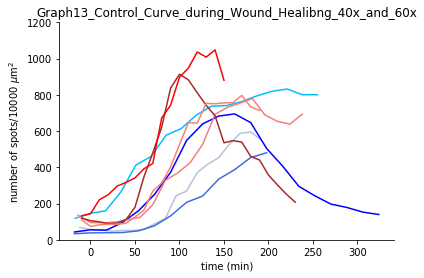

In [38]:
fig, ax = plt.subplots()
a2.r.plot(color='lightsteelblue')
b2.r.plot(color='royalblue')
c2.r.plot(color='b')
d2.r.plot(color='deepskyblue')
e2.r.plot(color='lightcoral')
f2.r.plot(color='brown')
g2.r.plot(color='red')
h2.r.plot(color='salmon')
plt.ylim(0,1200)
plt.ylabel('number of spots/10000 $\mu$m$^{2}$')
plt.xlabel('time (min)')
plt.title('Graph13_Control_Curve_during_Wound_Healibng_40x_and_60x')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Graph13_Control_Curve_during_Wound_Healibng_40x_and_60x.png',bbox_inches='tight')

In [19]:
r'$sq{\mu_i}$'

'$sq{\\mu_i}$'

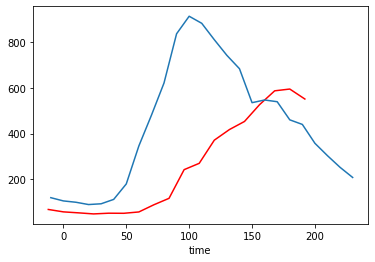

In [37]:
a2.r.plot(color='red')
f2.r.plot()
#ax.legend(['blue'])

In [ ]:
10000/(0.1111*0.1111*1000*970)

In [ ]:
10000/(0.1626*0.1626*1000*970)